In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Tingkat Ketergantungan Pada Gadget (Jawaban).csv")

In [3]:
df.head()

,Timestamp,Nama,Usia,Gelisah saat tidak ada Gadget,Keberatan Melepas Gadget,Gadget saat aktivitas lain,sering memeriksa feed,skala periksa feed,Lama memakai gadget dalam sehari,kegiatan paling lama saat gadgetan,biaya ngegadget,penghasilan dari gadget,gadget saat luang,langsung beli gadget saat rusak
0,12/5/2021 22:17:20,Rexion,18,4,Ya Ya Ya,"Ya, tentu",G,4,> 5 jam,"Nonton Film , Kartun , etc",35,NaN,Ya,Ya
1,12/5/2021 22:18:50,Lexion,19,2,Tidak,"Ya, tentu",G,1,> 5 jam,produktif,50,NaN,Tidak,Tidak
2,12/6/2021 9:22:14,Chinta 'Aliyyah Candramaya,20,2,Tidak,"Ya, tentu",Y,4,> 5 jam,produktif,100,1500,Ya,Tidak
3,12/6/2021 9:40:01,Shafira hemalia berliana putri,19,2,Tidak,"Ya, tentu",Y,3,> 5 jam,"Mantengin Medsos (IG, Twitter, FB, Tiktok, etc)",49000,2.8jt,Ya,Ya
4,12/6/2021 9:40:05,Stefany Amanda Kurniawa,18,2,Ya Ya Ya,"Ya, tentu",G,1,> 5 jam,"Nonton Film , Kartun , etc",Pake wifi,NaN,Tidak,Tidak


In [4]:
df = df.drop(columns = ["Timestamp","Nama"])

In [5]:
df.columns.values

array(['Usia', 'Gelisah saat tidak ada Gadget',
       'Keberatan Melepas Gadget', 'Gadget saat aktivitas lain',
       'sering memeriksa feed', 'skala periksa feed',
       'Lama memakai gadget dalam sehari',
       'kegiatan paling lama saat gadgetan', 'biaya ngegadget',
       'penghasilan dari gadget', 'gadget saat luang',
       'langsung beli gadget saat rusak'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Usia                                75 non-null     object
 1   Gelisah saat tidak ada Gadget       75 non-null     int64 
 2   Keberatan Melepas Gadget            75 non-null     object
 3   Gadget saat aktivitas lain          75 non-null     object
 4   sering memeriksa feed               75 non-null     object
 5   skala periksa feed                  75 non-null     int64 
 6   Lama memakai gadget dalam sehari    75 non-null     object
 7   kegiatan paling lama saat gadgetan  75 non-null     object
 8   biaya ngegadget                     75 non-null     object
 9   penghasilan dari gadget             17 non-null     object
 10  gadget saat luang                   75 non-null     object
 11  langsung beli gadget saat rusak     75 non-null     object
d

In [7]:
penghasilan = df["penghasilan dari gadget"].str.extract(r'(\d+)').values

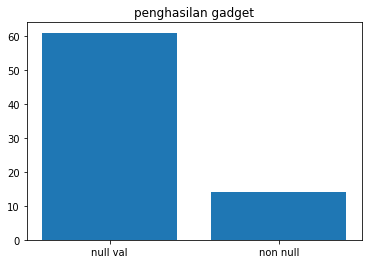

In [8]:
count = { 
    "null val":0,
    "non null" : 0
}
for items in penghasilan.tolist():
    item = items[0]
    if type(item) == float:
        count['null val'] += 1
    else:
        count['non null'] += 1

state = list(count.keys())
values = list(count.values())

plt.bar(range(len(count)),values,tick_label = state)
plt.title("penghasilan gadget")
plt.show()

In [9]:
df = df.drop(columns=["penghasilan dari gadget"])

Text(0.5, 1.0, 'Biaya Ngegadget')

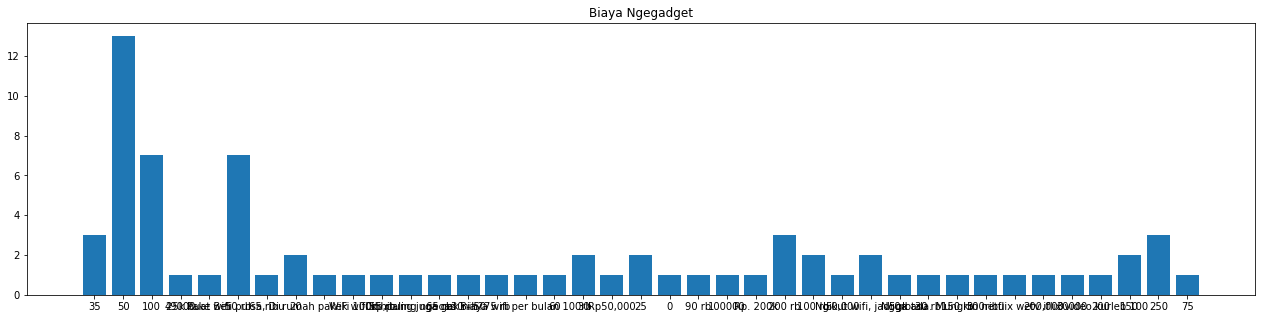

In [10]:
count = {}

for item in df['biaya ngegadget'].values.tolist():
    if item in count:
        count[(item)] += 1
    else:
        count[item] = 1

names = list(count.keys())
values = list(count.values())
plt.figure(figsize=(22,5))
plt.bar(range(len(count)),values,tick_label = names)
plt.title("Biaya Ngegadget")

In [11]:
df["biaya ngegadget"] = df["biaya ngegadget"].str.extract(r'(\d+)')

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 74
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Usia                                72 non-null     object
 1   Gelisah saat tidak ada Gadget       72 non-null     int64 
 2   Keberatan Melepas Gadget            72 non-null     object
 3   Gadget saat aktivitas lain          72 non-null     object
 4   sering memeriksa feed               72 non-null     object
 5   skala periksa feed                  72 non-null     int64 
 6   Lama memakai gadget dalam sehari    72 non-null     object
 7   kegiatan paling lama saat gadgetan  72 non-null     object
 8   biaya ngegadget                     72 non-null     object
 9   gadget saat luang                   72 non-null     object
 10  langsung beli gadget saat rusak     72 non-null     object
dtypes: int64(2), object(9)
memory usage: 6.8+ KB


In [16]:
df["Usia"] = df["Usia"].str.extract(r'(\d+)')
df["Usia"] = df["Usia"].astype('int64')

In [ ]:
df["Keberatan Melepas Gadget"] = df["Keberatan Melepas Gadget"].replace({"Ya Ya Ya" : 1, "Tidak":0})
df["Gadget saat aktivitas lain"] = df["Gadget saat aktivitas lain"].replace({"Ya, tentu" : 1, "Tentu saja tidak":0})
df["sering memeriksa feed"] = df["sering memeriksa feed"].replace({"Y" :1, "G":0})
df["gadget saat luang"] = df["gadget saat luang"].replace({"Ya" :1, "Tidak":0})
df["langsung beli gadget saat rusak"] = df["langsung beli gadget saat rusak"].replace({"Ya" :1, "Tidak":0})
df["Lama memakai gadget dalam sehari"] = df["Lama memakai gadget dalam sehari"].replace({"1 - 2 Jam" : 1, "2 - 4 Jam":2, "4 - 5 Jam" : 3, "> 5 jam":4})
df["kegiatan paling lama saat gadgetan"] = df["kegiatan paling lama saat gadgetan"].replace({"Maen game" : 1, "Mantengin Medsos (IG, Twitter, FB, Tiktok, etc)":2, "Ngesimp Streamer" : 3, "Nonton Film , Kartun , etc":4, "produktif":5})

In [ ]:
df.head()

In [17]:
df["biaya ngegadget"] = df["biaya ngegadget"].astype('int64')

In [ ]:
df.boxplot(["biaya ngegadget"])

In [ ]:
df['biaya ngegadget'] = df['biaya ngegadget'].drop(df[df['biaya ngegadget'] > 10000].index)
df = df.dropna()

In [ ]:
df.info()

In [12]:
def show_hist(item):

    plt.clf()
    plt.figure()
    # melihat distribusi data kolom 'Pendapatan' menggunakan 'pyplot.hist' dari matplotlib.pyplot
    plt.hist(x=f'{item}', data=df)
    plt.xlabel('Pendapatan')
    plt.title(f'Distribusi {item}', size=14)
    plt.tight_layout()
    plt.show()

<Figure size 432x288 with 0 Axes>

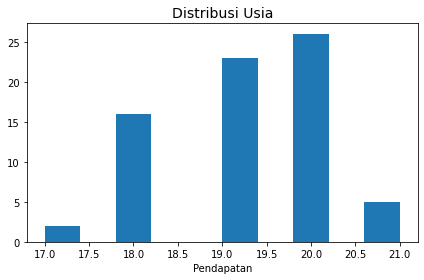

<Figure size 432x288 with 0 Axes>

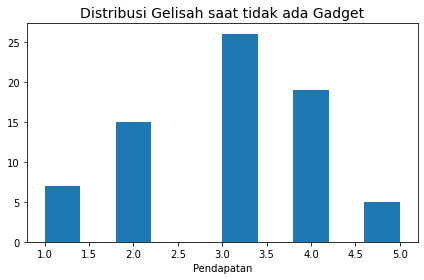

<Figure size 432x288 with 0 Axes>

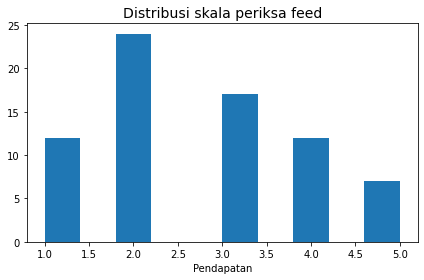

<Figure size 432x288 with 0 Axes>

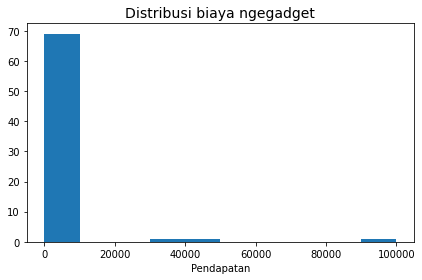

In [18]:

for item in df.select_dtypes(include=['int64',"float64"]):
    show_hist(item)


In [ ]:
df.head()

In [ ]:
selected_col = df.iloc[:,2:]
selected_col.head()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:

arrayed = np.array(selected_col)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(arrayed)

In [ ]:
kmeans = KMeans(n_clusters= 3,random_state = 0)
kmeans.fit(scaled)
df["Kluster"] = kmeans.labels_

In [ ]:
count = {}

for item in df['Kluster'].values.tolist():
    if item in count:
        count[(item)] += 1
    else:
        count[item] = 1

names = list(count.keys())
values = list(count.values())
plt.figure(figsize=(12,5))
plt.bar(range(len(count)),values,tick_label = names)
plt.title("Tingkat Kecanduan Gadget")

plt.show()

In [ ]:
out = plt.scatter(scaled[:,0],df.iloc[:,0],s = 100, c = df.Kluster, marker = "." , alpha =1)
ct = plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200, c = 'red', marker = "o" , alpha =1)

plt.colorbar(out)

plt.show()

In [ ]:
def func(pct, allvalues):
    absolute = round(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, int(absolute))

plt.figure(figsize=(22,5))
plt.pie(values,labels = names,explode=[0.1,0.1,0.1],autopct=lambda pct: func(pct, values))
plt.title("Tingkat Kecanduan Gadget")

In [ ]:
df.info()

In [ ]:
count

In [ ]:
df.head()